<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_23/CS166_Session_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{0: 0.013219148507568473, 1: 0.04305614905051308, 2: 0.022418442238567305, 3: 0.020763573555365067, 4: 0.15194090000926444, 5: 0.015278038556628359, 6: 0.0435719907662455, 7: 0.08868962006965002, 8: 0.009276594051426116, 9: 0.0272152235733787, 10: 0.009276594051426116, 11: 0.009276594051426116, 12: 0.009276594051426116, 13: 0.021104257419853188, 14: 0.02353550008408596, 15: 0.009276594051426116, 16: 0.01813520391793683, 17: 0.009276594051426116, 18: 0.012649668919200122, 19: 0.05375946044542633, 20: 0.009276594051426116, 21: 0.011904963688854353, 22: 0.15057445865003966, 23: 0.020843771954589734, 24: 0.025679331302227968, 25: 0.027216869246589045, 26: 0.0925438315518033, 27: 0.009276594051426116, 28: 0.009276594051426116, 29: 0.03241025002937753}


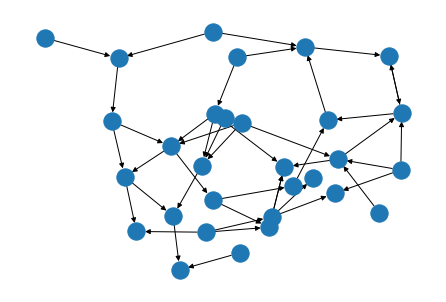

In [4]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter


g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

print(nx.pagerank(g))

In [7]:
def pagerank_algorithm(g, alpha = 0.85, N = 500):
    nodes = list(g.nodes)
    node = random.choice(nodes)

    results = [node]

    for i in range(N):
        if random.random() < alpha:
            neighbors = list(g.neighbors(node))
            if not neighbors:
                node = random.choice(nodes)
            else:
                node = random.choice(neighbors)
        else:
            node = random.choice(nodes)
        results.append(node)
    
    result_dict = Counter(results)
    for key in result_dict.keys():
        result_dict[key] /= len(results)
    return result_dict


In [18]:
manual = pagerank_algorithm(g)
encoded = nx.pagerank(g)

print(manual)



Counter({22: 0.17365269461077845, 4: 0.17165668662674652, 26: 0.08383233532934131, 7: 0.07784431137724551, 19: 0.05588822355289421, 29: 0.0499001996007984, 1: 0.0499001996007984, 6: 0.043912175648702596, 24: 0.027944111776447105, 14: 0.02594810379241517, 5: 0.01996007984031936, 3: 0.01996007984031936, 9: 0.017964071856287425, 18: 0.017964071856287425, 25: 0.017964071856287425, 13: 0.015968063872255488, 17: 0.013972055888223553, 16: 0.013972055888223553, 21: 0.013972055888223553, 2: 0.013972055888223553, 0: 0.011976047904191617, 15: 0.007984031936127744, 12: 0.007984031936127744, 10: 0.007984031936127744, 11: 0.007984031936127744, 23: 0.005988023952095809, 28: 0.005988023952095809, 27: 0.005988023952095809, 8: 0.005988023952095809, 20: 0.005988023952095809})


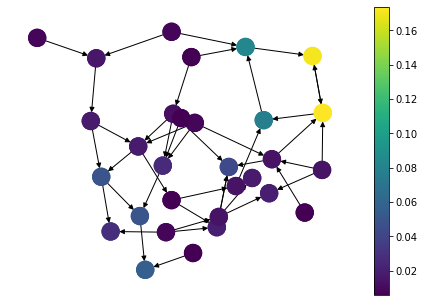

In [20]:
density = [manual[i] for i in range(len(manual))]

nx.draw(g, pos=nx.kamada_kawai_layout(g), node_color=density)

node_colors = nx.draw_networkx_nodes(g, pos=nx.kamada_kawai_layout(g), nodelist=list(g.nodes), node_color=density)
plt.colorbar(node_colors)
plt.show()

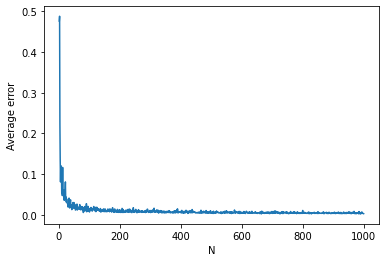

In [28]:
def plot_errors(g, N_max):
    errors = []
    trials = [i for i in range(1, N_max + 1)]
    for N in trials:
        manual = pagerank_algorithm(g, N = N)
        encoded = nx.pagerank(g)
        total_error = 0
        for node in manual:
            total_error += abs(manual[node] - encoded[node])
        errors.append(total_error/len(manual))
    
    plt.plot(trials, errors)
    plt.xlabel("N")
    plt.ylabel("Average error")
    plt.show()

plot_errors(g, 1000)


